In [1]:
#importan librerias

#Librerias base
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import os
import cv2

from glob import glob 
#Librerias de modelado
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix

In [3]:
#Funcion para leer las imagenes de un folder
def load_folder_with_label(folder_path,size = (128,128)):
  files = glob(os.path.join(folder_path,"*"))
  label = os.path.basename(folder_path).strip().lower().replace(" ","_")
  X = map(plt.imread, files)
  X = map(lambda img: cv2.resize(img, size), X)
  X = list(X)
  y = [label] * len(X)
  return X,y 

In [5]:
image_size = (64,64)

In [7]:
#Cargamos los datos de entrenamiento de la clase 0 y clase 1
X_0, y_0 = load_folder_with_label("C:/Users/andre/Proyecto_Integrador/Algoritmo_CNN/Clasificacion_Keras2/Data_20240423/Train_Images/ok_images",size = image_size)
X_1, y_1 = load_folder_with_label("C:/Users/andre/Proyecto_Integrador/Algoritmo_CNN/Clasificacion_Keras2/Data_20240423/Train_Images/nok_images",size = image_size)
X = X_0 + X_1
y = y_0 + y_1
del X_0 , X_1, y_0 , y_1

In [9]:
#Cargamos los datos de validacion de la clase 0 y clase 1
X_validation_0, y_validation_0 = load_folder_with_label("C:/Users/andre/Proyecto_Integrador/Algoritmo_CNN/Clasificacion_Keras2/Data_20240423/Validation_Images/ok_images",size = image_size)
X_validation_1, y_validation_1 = load_folder_with_label("C:/Users/andre/Proyecto_Integrador/Algoritmo_CNN/Clasificacion_Keras2/Data_20240423/Validation_Images/nok_images",size = image_size)
X_validation = X_validation_0 + X_validation_1
y_validation = y_validation_0 + y_validation_1
del X_validation_0 , X_validation_1, y_validation_0 , y_validation_1

In [11]:
#codificamos la target
lbl = LabelEncoder()
y = lbl.fit_transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [13]:
y_validation = lbl.transform(y_validation)
y_validation

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

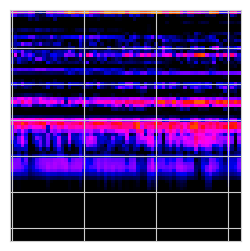

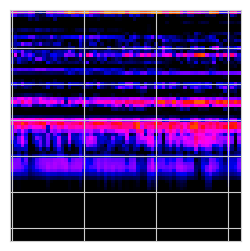

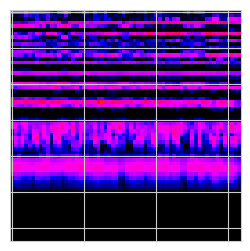

In [15]:
#Vistazo a nuestro dataset
for img in X[:3]:
  plt.figure(figsize = (3,3))
  plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
  plt.imshow(img, cmap = "gray")
  plt.show()

In [ ]:
X = np.array(X)
X_validation = np.array(X_validation)

In [ ]:
X=X/255

In [ ]:
X.shape

In [ ]:
#size = X.shape[1]*X.shape[2]
# X = X.reshape((len(X),size))
# X_validation = X_validation.reshape((len(X_validation),size))

In [ ]:
#Partición de muestras entrenamiento y testing
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.15, random_state=42)

In [ ]:
X_train.shape

In [ ]:
# Crear el modelo secuencial
model = Sequential()

model.add(Flatten(input_shape=(image_size[0], image_size[1], 4)))

#model.add(Dense(256, activation='relu'))

model.add(Dense(128, activation='relu'))

model.add(Dense(64, activation='relu'))

model.add(Dense(32, activation='relu'))

model.add(Dense(16, activation='relu'))

model.add(Dense(units = 10, activation='softmax'))

# Agregar una capa de dropout con una tasa del 50%
model.add(Dropout(0.05))

# Agregar una capa densa de salida con una neurona y activación 'sigmoid' para clasificación binaria
model.add(Dense(1, activation='sigmoid'))

In [ ]:
#Resumen de la arquitectura del modelo
model.summary()

In [ ]:
# Compilar el modelo con el optimizador 'adam', la función de pérdida BinaryCrossentropy y métricas de precisión

model.compile(optimizer='adam',
              loss=BinaryCrossentropy(),
              metrics=['accuracy'])
# Entrenar el modelo con los datos de entrenamiento y validar con los datos de prueba

history = model.fit(X_train, y_train, epochs=25, 
                    validation_data=(X_test, y_test))

In [ ]:
# Obtén los datos del historial
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Crea la figura y los subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

# Gráfica de accuracy
ax1.plot(accuracy, label='Accuracy Entrenamiento')
ax1.plot(val_accuracy, label='Accuracy Validación')
ax1.set_xlabel('Épocas')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Gráfica de pérdida
ax2.plot(loss, label='Pérdida Entrenamiento')
ax2.plot(val_loss, label='Pérdida Validación')
ax2.set_xlabel('Épocas')
ax2.set_ylabel('Pérdida')
# plt.ylim(None,.8)
ax2.legend()

# Ajusta los márgenes y espacios entre subplots
plt.tight_layout()

# Muestra las gráficas
plt.show()

In [ ]:
y_proba_train = model.predict(X_train)
y_pred_train = y_proba_train.round().astype(int)
y_proba_test = model.predict(X_test)
y_pred_test = y_proba_test.round().astype(int)
y_proba_validation = model.predict(X_validation)
y_pred_validation = y_proba_validation.round().astype(int)

In [ ]:
print("Train sample \n", classification_report(y_train, y_pred_train,target_names = lbl.classes_))
print("Test sample \n", classification_report(y_test, y_pred_test,target_names = lbl.classes_))
print("validation sample \n", classification_report(y_validation, y_pred_validation,target_names = lbl.classes_))

In [ ]:
!pip install -q scikit-plot
import scikitplot as skplt

In [ ]:
# Gráfico de Matriz de Confusión
skplt.metrics.plot_confusion_matrix(y_train, y_pred_train, normalize=True)
plt.title('Matriz de Confusión Train')

skplt.metrics.plot_confusion_matrix(y_test, y_pred_test, normalize=True)
plt.title('Matriz de Confusión Test')

skplt.metrics.plot_confusion_matrix(y_validation, y_pred_validation, normalize=True)
plt.title('Matriz de Confusión Validation')
plt.show() 

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,5))

skplt.metrics.plot_roc(y_train, np.column_stack((1-y_proba_train, y_proba_train)), ax=axes[0])
axes[0].set_title("Muestra train")

skplt.metrics.plot_roc(y_test, np.column_stack((1-y_proba_test, y_proba_test)), ax=axes[1])
axes[1].set_title("Muestra test")

skplt.metrics.plot_roc(y_validation, np.column_stack((1-y_proba_validation, y_proba_validation)), ax=axes[2])
axes[2].set_title("Muestra validation")
axes[2].legend(loc="lower right")
